In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
import scipy
from scipy.stats.stats import pearsonr,spearmanr
from scipy.stats import chi2_contingency
from sklearn import decomposition
from sklearn.decomposition import PCA

In [6]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 14
sb.set_style('whitegrid')

In [7]:
df = pd.read_csv("/Users/Varun/Downloads/diabetes.csv");

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.shape

(768, 9)

In [10]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
df['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

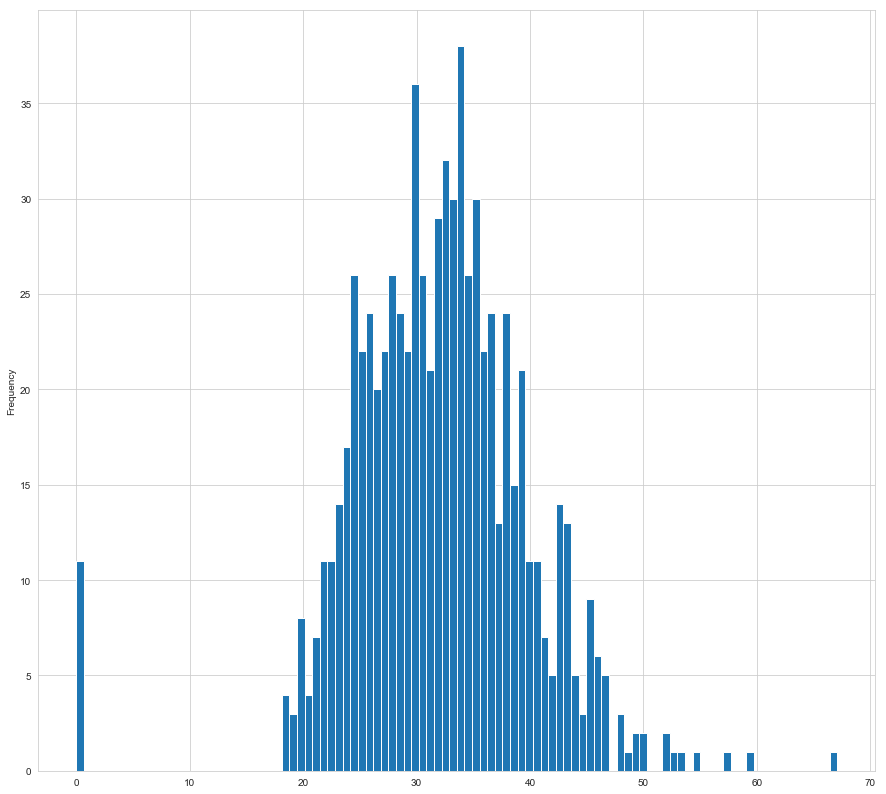

In [12]:
df['BMI'].plot(kind='hist', bins=100)

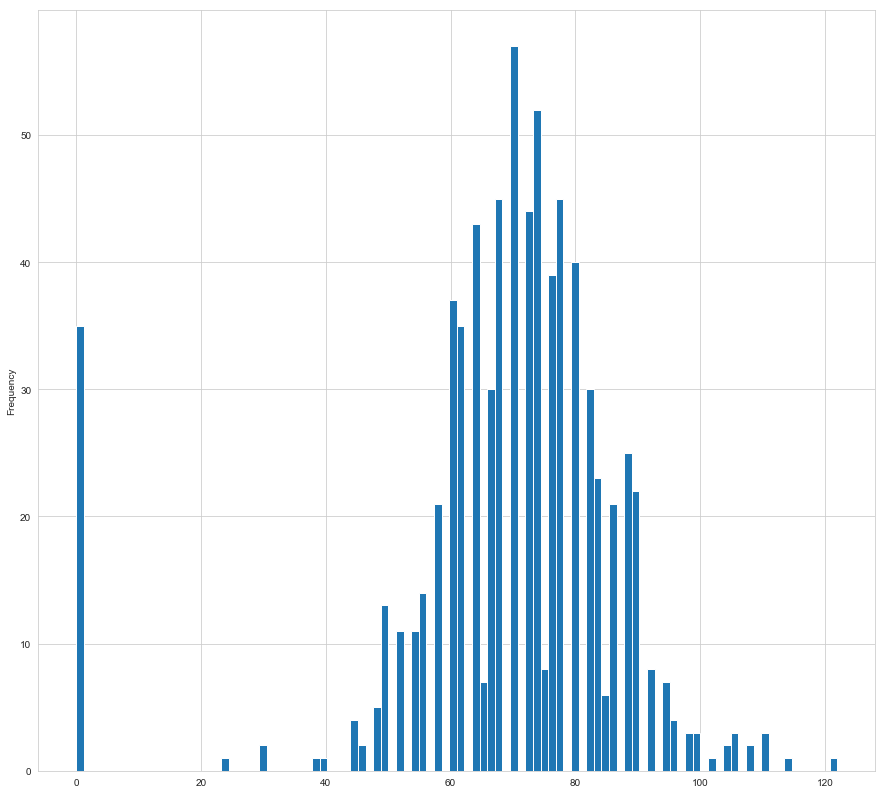

In [13]:
df['BloodPressure'].plot(kind='hist', bins=100)

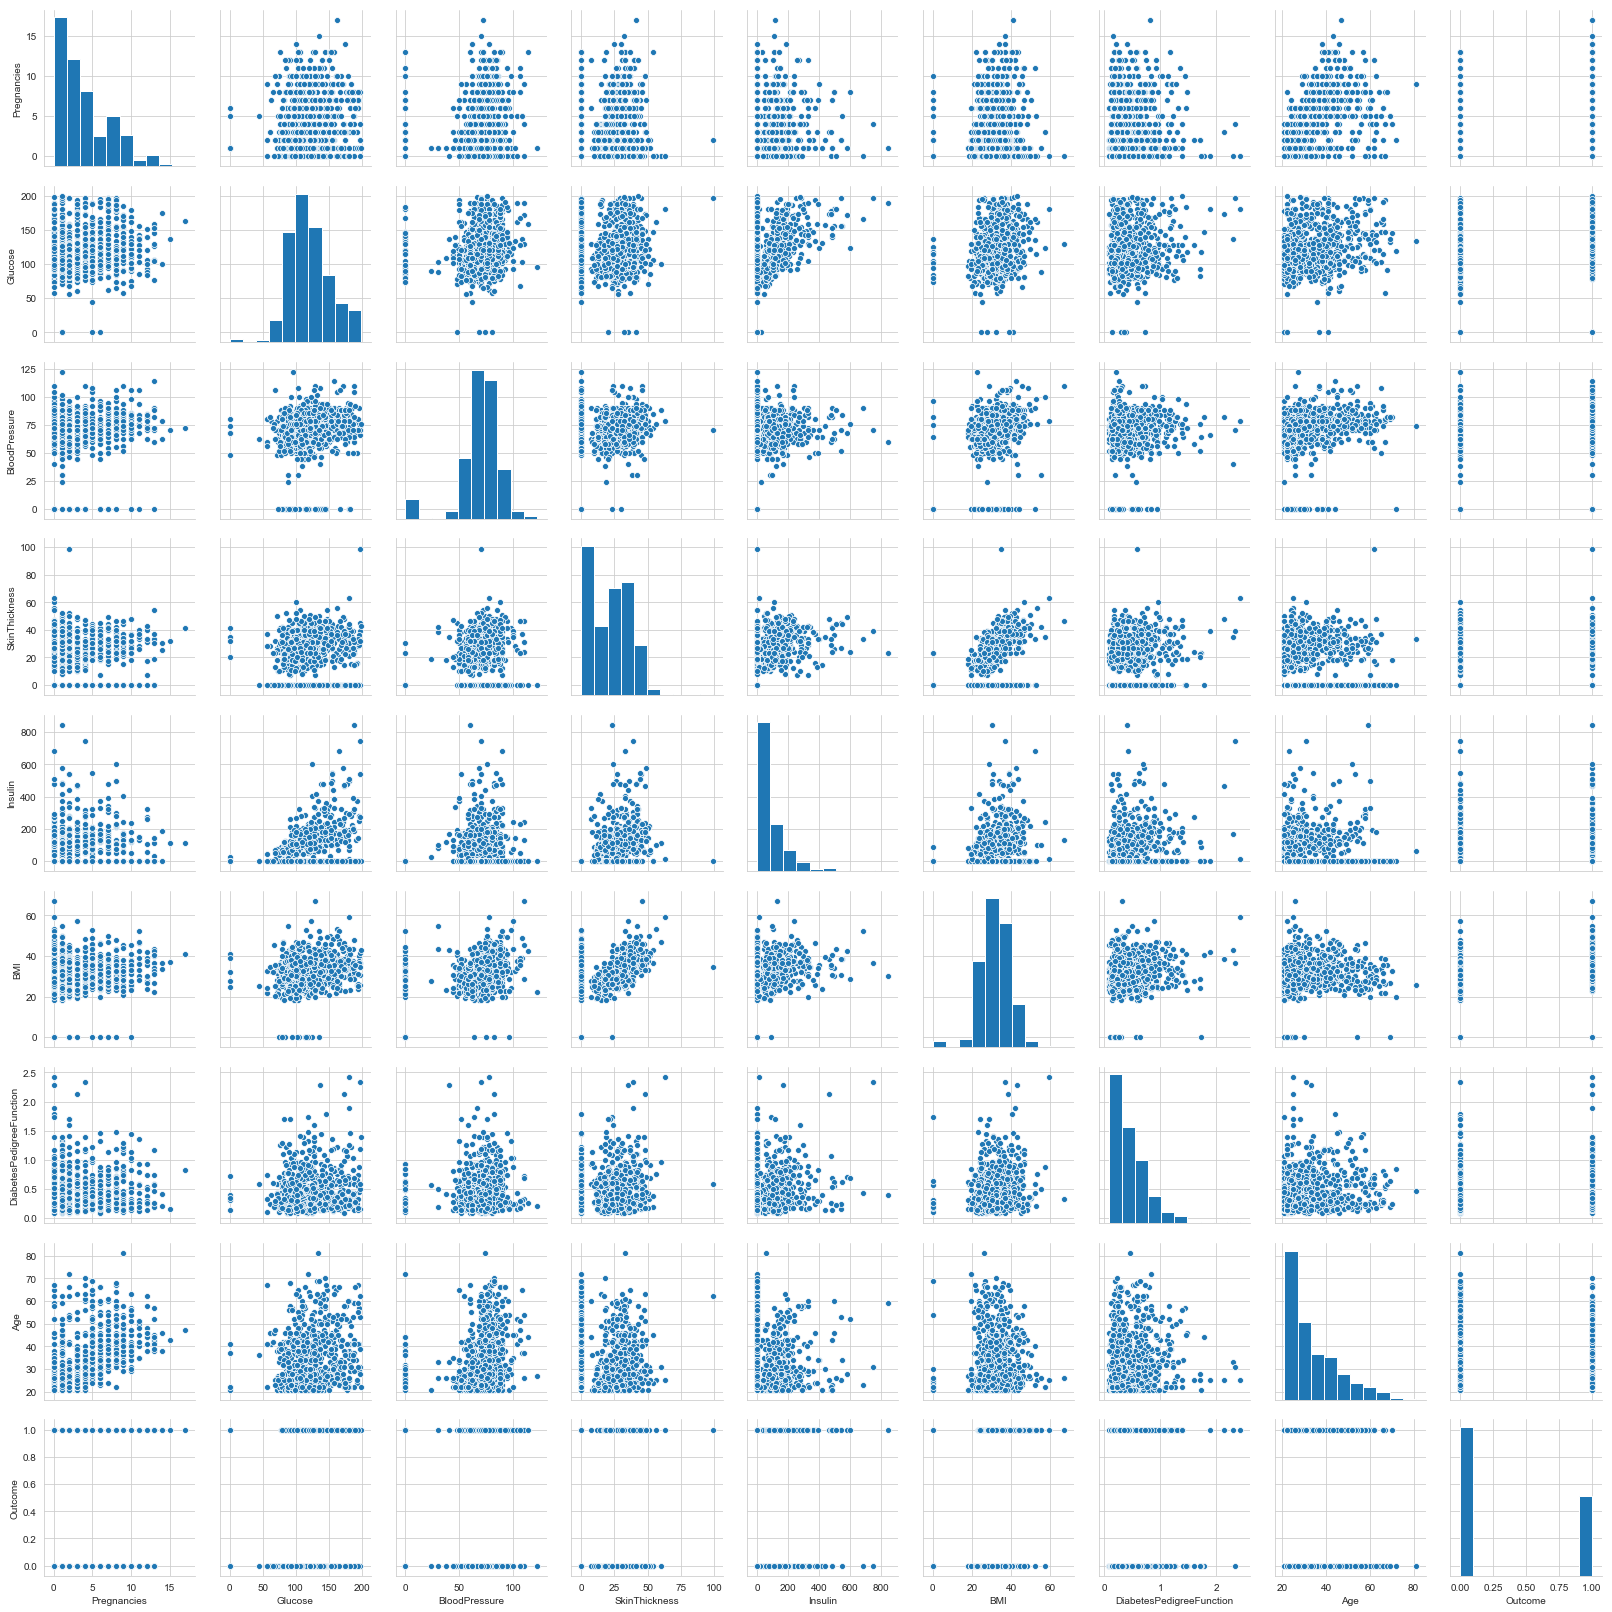

In [14]:
#df.plot(kind='scatter', x='DiabetesPedigreeFunction', y='Outcome', c =['yellow'], s=150)
sb.pairplot(df)

In [15]:
pearsonr(df['BloodPressure'], df['DiabetesPedigreeFunction'])

(0.04126494793009857, 0.2533743720191892)

In [16]:
spearmanr(df['BloodPressure'], df['DiabetesPedigreeFunction'])

SpearmanrResult(correlation=0.030046334854222177, pvalue=0.4056912723988306)

In [17]:
table = pd.crosstab(df['SkinThickness'],  df['Outcome'])

p value should be greater than 0.05 to conclude that variables are independent of one another. From the above result we can say that the variables are not completely independent of one another

In [18]:
chi2, p, dof, expected = chi2_contingency(table.values)
print(chi2, p)

73.56289367672626 0.016681406114890975


Removing entries where BloodPressure and BMI are zero

In [37]:
df = df[~((df['BloodPressure'] == 0) & (df['BMI'] == 0))]

In [48]:
pca = decomposition.PCA()
pca.fit_transform(df)
pca.explained_variance_ratio_

array([8.91569951e-01, 6.14912496e-02, 2.29831606e-02, 1.31928643e-02,
       7.48900174e-03, 2.74753703e-03, 5.08789401e-04, 1.08645590e-05,
       6.58139823e-06])

In [49]:
pca.explained_variance_ratio_.sum()

1.0000000000000002

In [54]:
comps = pd.DataFrame(pca.components_)
comps

,0,1,2,3,4,5,6,7,8
0,-0.002014,0.096678,0.012041,0.059835,0.993357,0.012201,0.000525,-0.004134,0.000575
1,-0.022272,-0.976514,-0.112926,0.066529,0.092246,-0.037192,-0.000759,-0.137125,-0.007008
2,-0.028669,0.111676,-0.927768,-0.312614,0.019665,-0.089650,-0.000407,-0.140721,0.000102
3,-0.048719,0.119826,-0.257327,0.886736,-0.065657,0.191559,0.002692,-0.299552,0.002629
4,0.150338,-0.088458,-0.243199,0.253089,0.000034,0.032896,0.001696,0.919375,0.006155
5,-0.017179,0.048778,0.031021,0.209531,-0.005814,-0.975787,-0.001541,-0.006956,-0.014663
6,0.986413,0.001534,-0.004558,0.001419,0.001337,-0.016243,-0.006171,-0.162278,0.018070
7,-0.016989,-0.006017,0.002107,-0.001006,0.000066,-0.015075,0.246368,-0.003368,0.968883
8,0.010416,0.000669,0.000140,-0.002419,-0.000293,0.001514,0.969150,-0.001129,-0.246232


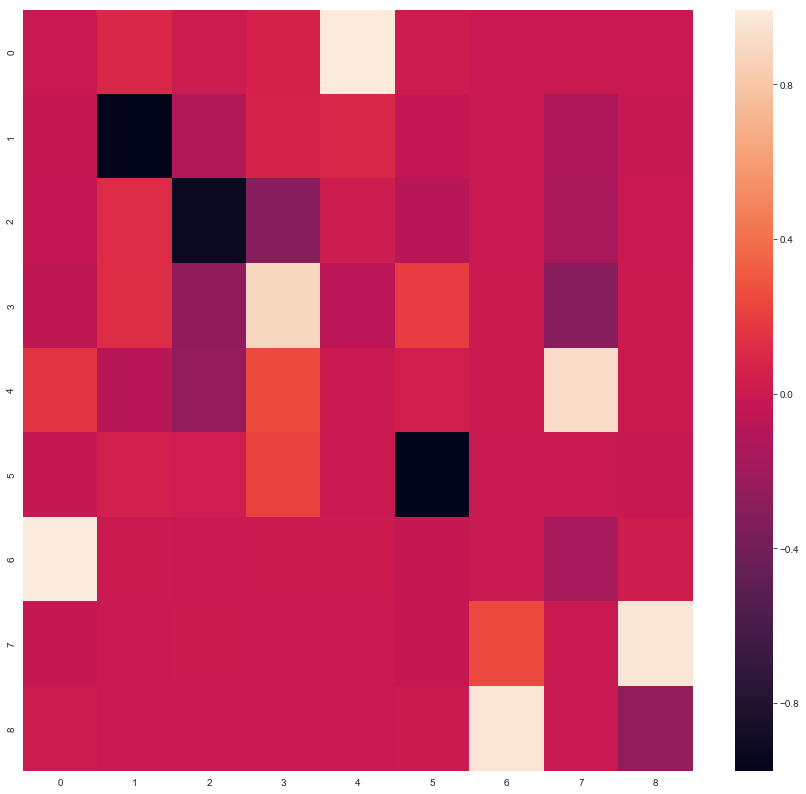

In [55]:
sb.heatmap(comps)